In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
from time import time
from PIL import Image
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#load data from file
X_train = np.load('80/X_train.npy',allow_pickle=True)
y_train = np.load('80/y_train.npy',allow_pickle=True)
X_test = np.load('80/X_test.npy',allow_pickle=True)
y_test = np.load('80/y_test.npy',allow_pickle=True)

In [3]:
#rescale image
X_train = X_train/255
X_test = X_test/255

In [4]:
#shuffle array in same way
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [5]:
#resizee to 1d
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [6]:
X_train[1]

array([0.3254902 , 0.31764706, 0.31372549, ..., 0.05098039, 0.05098039,
       0.05098039])

In [7]:
def image_grid(D,H,W, cols=10,scale=1):
  """ displays a grid of images
    H,W: Height and width of the images
    cols: number of columns = number of images in each row
    scale: 1 to fill screen
  """
  n = np.shape(D)[0]
  rows = int(math.ceil((n + 0.0)/cols))
  fig = plt.figure(1, figsize=[scale*20.0/H*W,scale*20.0/cols*rows], dpi=300)
  for i in range (n):
    plt.subplot(rows, cols, i + 1)
    fig = plt.imshow(np.reshape(D[i, :], [H, W]), cmap= plt.get_cmap("gray"))
    plt.axis('off')

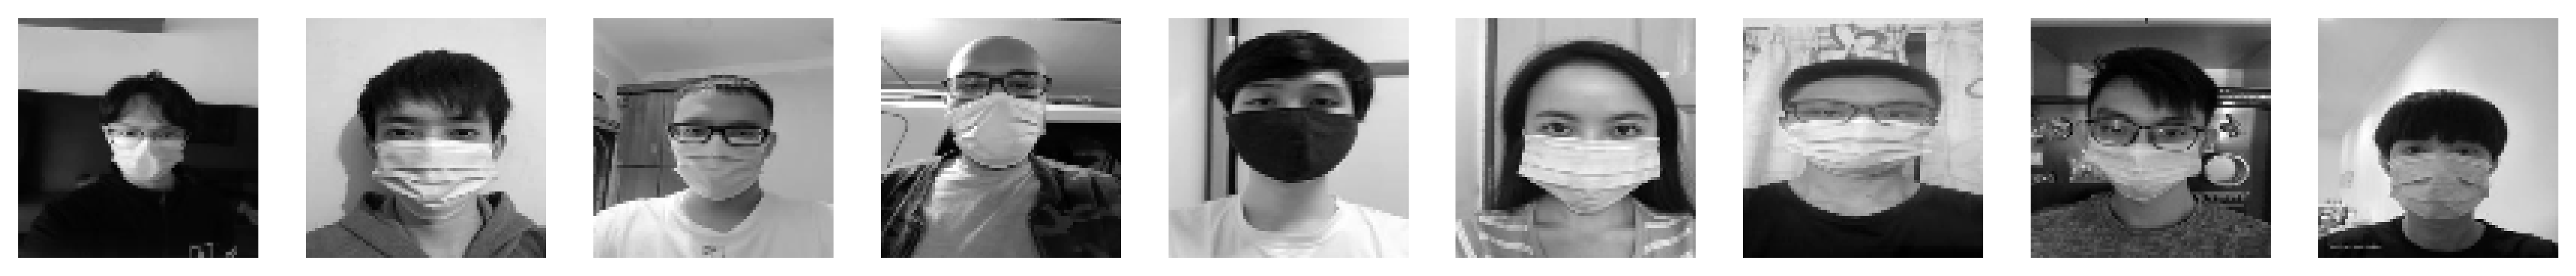

In [8]:
H=80
W=80

# Show training images
image_grid(X_train[1:10],H,W)
plt.show()

In [9]:
# Call the PCA module contained in sklearn. Extract the top 40 eigenfaces from the datasets. Display the eigenfacess

from sklearn.decomposition import PCA
n_comp=700

#Extract the top 40 eigenfaces from the dataset
pca=PCA(n_components = n_comp).fit(X_train)

#Show the eigen faces
#eigenfaces = pca.components_
#image_grid(eigenfaces[:,:],H,W)
#plt.show()

#eigenfaces=eigenfaces.reshape((n_comp,H,W))

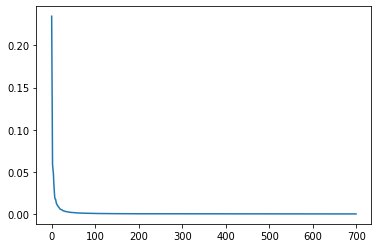

In [10]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [11]:
#Project the training and testing data on the eigenfaces
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

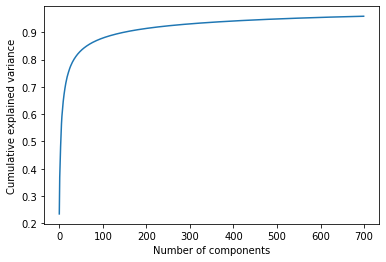

In [12]:
# plot the cumulative variance against the number of principal componenets

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=300,criterion='gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_pca,y_train)

In [14]:
y_pred=clf.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.93      0.68       100
           1       0.76      0.97      0.85       100
           2       0.90      0.99      0.94       100
           3       0.98      0.98      0.98       100
           4       0.84      1.00      0.91       100
           5       0.66      0.87      0.75       100
           6       0.66      0.85      0.75       100
           7       0.54      0.93      0.69       100
           8       0.44      0.77      0.56       100
           9       0.58      0.45      0.51       100
          10       0.59      0.67      0.63       100
          11       0.60      0.75      0.66       100
          12       0.62      0.24      0.35       100
          13       0.54      0.57      0.56       100
          14       0.78      1.00      0.88       100
          15       0.52      0.63      0.57       100
          16       0.57      0.79      0.66       100
          17       0.58    

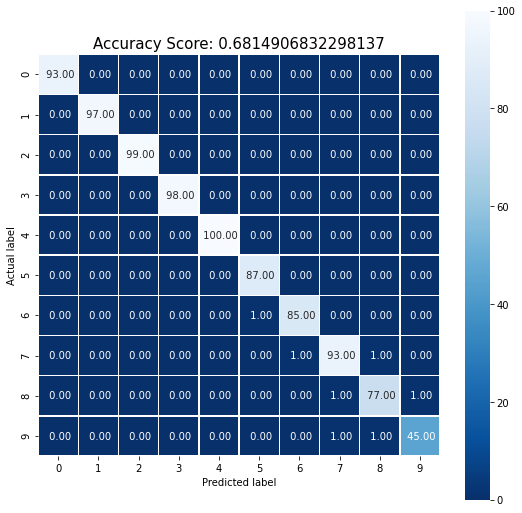

In [15]:
predictions = clf.predict(X_test_pca)
cm = confusion_matrix(y_test, predictions)
score = accuracy_score(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm[0:10,0:10], annot=True, fmt=" .2f", linewidth=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()